In [149]:
import pandas as pd
import seaborn as sns
from rdkit import Chem
import useful_rdkit_utils as uru
import numpy as np
from rdkit import Chem
import mols2grid
from rdkit import DataStructs

In [170]:
df = pd.read_csv("chembl_drugs_usan.csv")

In [171]:
df.query("first_approval == 2018 and first_in_class == 1").shape

(11, 9)

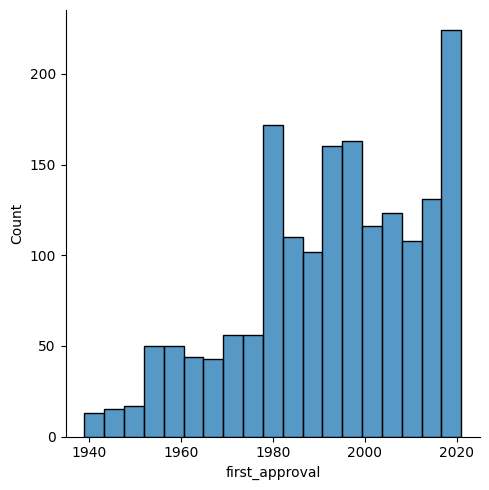

In [172]:
sns.displot(df.first_approval)

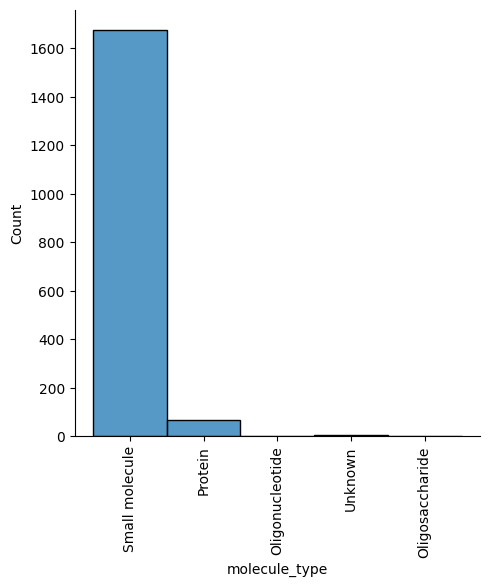

In [173]:
ax = sns.displot(df.molecule_type)
ax.tick_params(axis='x', rotation=90)

In [174]:
df_small_mol = df.query("molecule_type == 'Small molecule'").copy()

In [175]:
df_small_mol['mol'] = df_small_mol.canonical_smiles.apply(Chem.MolFromSmiles)

In [176]:
df_small_mol['freebase_mol'] = df_small_mol.mol.apply(uru.get_largest_fragment)

In [177]:
df_small_mol['freebase_mw'] = df_small_mol.freebase_mol.apply(uru.MolWt)

In [178]:
df_small_mol = df_small_mol.dropna(subset=["usan_year"]).copy()

In [179]:
df_small_mol['era'] = pd.cut(df_small_mol.first_approval.values,bins=[0,1997,2017,2022],labels=["<1998","1998-2017","2018-2022"])

Text(0, 0.5, 'Freebase MW')

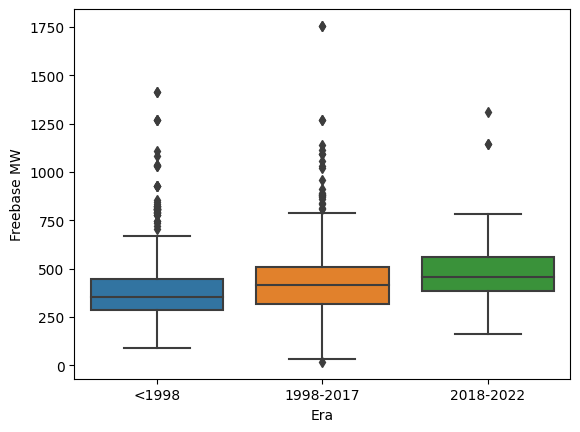

In [180]:
ax = sns.boxplot(x="era",y="freebase_mw",data=df_small_mol)
ax.set_xlabel("Era")
ax.set_ylabel("Freebase MW")

In [181]:
for era, vals in df_small_mol.groupby("era"):
    print(era,np.percentile(vals.freebase_mw,90))

<1998 567.7960000000003
1998-2017 666.703
2018-2022 642.7820000000003


In [182]:
np.percentile(range(0,9),90)

7.2

In [183]:
df_small_mol.era.value_counts()

<1998        707
1998-2017    489
2018-2022    168
Name: era, dtype: int64

In [184]:
xdf = pd.read_csv("41570_2022_451_MOESM2_ESM.csv")

In [185]:
xdf

,NAME,APPROVAL_YEAR,DRUG_UID,SMILES,MW,N_HBA,N_HBD,LOGP,RO5_violations,FRACTION_CSP3,N_HEAVY,N_ROT_BONDS,TPSA,LOGD_74
0,Daridorexant,2022,DB15031,COc1ccc(-n2nccn2)c(C(=O)N2CCCC2(C)c2nc3c(C)c(C...,450.921,8,1,3.602,0,0.304,32,4,88.93,3.530
1,Nirmatrelvir,2022,DB16691,CC(C)(C)C(NC(=O)C(F)(F)F)C(=O)N1CC2C(C1C(=O)NC...,499.526,9,3,3.173,0,0.783,35,9,131.40,3.130
2,Pacritinib,2022,DB11697,C1=C/COCc2cc(ccc2OCCN2CCCC2)Nc2nccc(n2)-c2cccc...,472.579,7,1,4.435,0,0.357,35,4,68.74,2.912
3,Abrocitinib,2022,DB14973,CCCS(=O)(=O)NC1CC(N(C)c2ncnc3[nH]ccc23)C1,323.414,7,2,1.825,0,0.571,22,6,99.36,1.816
4,Mitapivat,2022,DB16236,O=C(c1ccc(NS(=O)(=O)c2cccc3cccnc23)cc1)N1CCN(C...,450.553,7,1,2.337,0,0.333,32,6,90.99,2.164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Sarecycline,2018,DB12035,CON(C)Cc1ccc(O)c2c1CC1CC3C(N(C)C)C(O)=C(C(N)=O...,487.502,11,6,1.154,2,0.458,35,5,173.86,-1.757
113,Tafenoquine,2018,DB06608,COc1cc(C)c2c(Oc3cccc(C(F)(F)F)c3)c(OC)cc(NC(C)...,463.493,6,3,4.840,0,0.375,33,10,78.63,2.054
114,Benznidazole,2018,DB11989,O=C(Cn1ccnc1[N+](=O)[O-])NCc1ccccc1,260.249,7,1,0.985,0,0.167,19,5,92.74,0.985
115,Lusutrombopag,2018,DB13125,CCCCCCOC(C)c1cccc(-c2csc(NC(=O)c3cc(Cl)c(/C=C(...,591.546,7,2,6.695,2,0.345,39,13,125.99,3.496


In [186]:
def smi2inchikey(smi):
    mol = Chem.MolFromSmiles(smi)
    inchi_key = Chem.MolToInchiKey(mol)
    return inchi_key

In [187]:
paper_2018_df = xdf.query('APPROVAL_YEAR == 2018').copy()
paper_2018_df['inchi_key'] = paper_2018_df.SMILES.apply(smi2inchikey)
len(paper_2018_df)

27

In [188]:
chembl_2018_df = df.query("first_approval == 2018").copy()
chembl_2018_df['inchi_key'] = chembl_2018_df.canonical_smiles.apply(smi2inchikey)
len(chembl_2018_df)

52

In [189]:
len(set(chembl_2018_df.inchi_key).intersection(set(paper_2018_df.inchi_key)))

8

In [190]:
mols2grid.display(paper_2018_df,subset=["img","NAME","MW"])

MolGridWidget()

In [191]:
mols2grid.display(chembl_2018_df,smiles_col="canonical_smiles")

MolGridWidget()

In [192]:
for v in mols2grid.get_selection().values():
    print(get_standard_smiles((v)))

In [193]:
from rdkit.Chem.MolStandardize import rdMolStandardize

def get_standard_smiles(smiles):
    return Chem.MolToSmiles(standardize(smiles))

def standardize(smiles):
    # follows the steps in
    # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
    # as described **excellently** (by Greg) in
    # https://www.youtube.com/watch?v=eWTApNX8dJQ
    mol = Chem.MolFromSmiles(smiles)
     
    # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
    clean_mol = rdMolStandardize.Cleanup(mol) 
     
    # if many fragments, get the "parent" (the actual mol we are interested in) 
    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
         
    # try to neutralize molecule
    uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
     
    # note that no attempt is made at reionization at this step
    # nor at ionization at some pH (rdkit has no pKa caculator)
    # the main aim to to represent all molecules from different sources
    # in a (single) standard way, for use in ML, catalogue, etc.
     
    te = rdMolStandardize.TautomerEnumerator() # idem
    taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
     
    return taut_uncharged_parent_clean_mol

In [194]:
uru.rd_shut_the_hell_up()
chembl_2018_df['standard_smiles'] = chembl_2018_df.canonical_smiles.apply(get_standard_smiles)
paper_2018_df['standard_smiles'] = paper_2018_df.SMILES.apply(get_standard_smiles)

In [195]:
chembl_2018_df['std_inchi'] = chembl_2018_df.standard_smiles.apply(smi2inchikey)
paper_2018_df['std_inchi'] = paper_2018_df.standard_smiles.apply(smi2inchikey)

In [196]:
len(set(chembl_2018_df.std_inchi).intersection(set(paper_2018_df.std_inchi)))

9

In [197]:
a = uru.smi2morgan_fp("c1ccccc1")
b = uru.smi2morgan_fp("c1ccccn1")

In [198]:
DataStructs.BulkTanimotoSimilarity(a,[a,b])

[1.0, 0.3333333333333333]

In [199]:
chembl_2018_df['mol'] = chembl_2018_df.standard_smiles.apply(Chem.MolFromSmiles)
chembl_2018_df['fp'] = chembl_2018_df.mol.apply(uru.mol2morgan_fp)
paper_2018_df['mol'] = paper_2018_df.standard_smiles.apply(Chem.MolFromSmiles)
paper_2018_df['fp'] = paper_2018_df.mol.apply(uru.mol2morgan_fp)

In [200]:
for std_smiles, chembl_id,fp in chembl_2018_df[['standard_smiles','chembl_id','fp']].values:
    max_sim = max(DataStructs.BulkTanimotoSimilarity(fp,paper_2018_df.fp.values))
    if max_sim < 1.0:
        print(std_smiles, chembl_id, max_sim)

COCCCN1CCC(NC(=O)c2cc(Cl)c(N)c3c2OCC3)CC1 CHEMBL117287 0.20192307692307693
C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)cc1O CHEMBL190461 0.11764705882352941
CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(cc(O)c4c3C2=O)NC(=O)C(C)=CC=CC(C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C CHEMBL437765 0.12
N=C(N)NCc1cccc([131I])c1 CHEMBL1615779 0.21428571428571427
CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H](O[C@H]3OC(CNCCO)=CC[C@H]3N)[C@@H](N)C[C@H]2NC(=O)C(O)CCN)OC[C@]1(C)O CHEMBL1650559 0.14285714285714285
CN(C)C1C(=O)C(C(N)=O)C(=O)[C@@]2(O)C(=O)C3C(=O)c4c(O)c(NC(=O)CN5CCCC5)cc(F)c4C[C@H]3C[C@@H]12 CHEMBL1951095 0.5555555555555556
CO/N=C1\C[C@]2(C[C@@H]3C[C@@H](C/C=C(\C)C[C@@H](C)/C=C/C=C4\CO[C@@H]5[C@H](O)C(C)=CC(C(=O)O3)[C@]45O)O2)O[C@H](/C(C)=C/C(C)C)[C@H]1C CHEMBL2104415 0.10294117647058823
CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(cc(O)c4c3C2=O)NC(=O)C(C)=CC=CC(C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C CHEMBL2105680 0.12
COCCCN1CCC(NC(=O)c2cc(Cl)c(N)c3c2OCC3)

In [202]:
for std_smiles, fp in paper_2018_df[['standard_smiles','fp']].values:
    max_sim = max(DataStructs.BulkTanimotoSimilarity(fp,paper_2018_df.fp.values))
    if max_sim < 1.0:
        print(std_smiles, max_sim)